In [194]:
import pandas as pd
import numpy as np
import datetime
from datetime import date, datetime, timedelta

In [195]:
df_precep=pd.read_csv("/content/Daily Precipitation.csv")
df_precep.head()


,start_date,end_date,precip,region_id
0,2014-01-01T00:00:00.000Z,2014-01-01T00:00:00.000Z,1.392393,93
1,2014-01-02T00:00:00.000Z,2014-01-02T00:00:00.000Z,0.315380,93
2,2014-01-03T00:00:00.000Z,2014-01-03T00:00:00.000Z,2.347846,93
3,2014-01-04T00:00:00.000Z,2014-01-04T00:00:00.000Z,21.466357,93
4,2014-01-05T00:00:00.000Z,2014-01-05T00:00:00.000Z,32.823651,93


In [196]:
df_precep.start_date = pd.to_datetime(df_precep.start_date)
df_precep.end_date = pd.to_datetime(df_precep.end_date)
np.unique(df_precep["start_date"]-df_precep["end_date"])

array([0], dtype='timedelta64[ns]')

In [197]:
df_precep.drop(["end_date"],axis=1,inplace=True)

In [198]:
df_moisture=pd.read_csv("/content/Daily Soil Mositure.csv")
df_moisture.head()

,start_date,end_date,smos,region_id
0,2014-01-01T00:00:00.000Z,2014-01-01T00:00:00.000Z,0.310787,93
1,2014-01-02T00:00:00.000Z,2014-01-02T00:00:00.000Z,0.192271,93
2,2014-01-03T00:00:00.000Z,2014-01-03T00:00:00.000Z,0.265683,93
3,2014-01-04T00:00:00.000Z,2014-01-04T00:00:00.000Z,0.265683,93
4,2014-01-05T00:00:00.000Z,2014-01-05T00:00:00.000Z,0.230782,93


In [199]:
df_moisture.start_date = pd.to_datetime(df_moisture.start_date)
df_moisture.end_date = pd.to_datetime(df_moisture.end_date)
np.unique(df_moisture["start_date"]-df_moisture["end_date"])

array([0], dtype='timedelta64[ns]')

In [200]:
df_moisture.drop(["end_date"],axis=1,inplace=True)

In [201]:
merged_df=df_moisture.merge(df_precep,left_on=["start_date","region_id"],right_on=["start_date","region_id"],how="outer")
merged_df

,start_date,smos,region_id,precip
0,2014-01-01 00:00:00+00:00,0.310787,93,1.392393
1,2014-01-02 00:00:00+00:00,0.192271,93,0.315380
2,2014-01-03 00:00:00+00:00,0.265683,93,2.347846
3,2014-01-04 00:00:00+00:00,0.265683,93,21.466357
4,2014-01-05 00:00:00+00:00,0.230782,93,32.823651
...,...,...,...,...
29935,2022-03-09 00:00:00+00:00,NaN,105,0.041747
29936,2022-03-10 00:00:00+00:00,NaN,105,0.090011
29937,2022-03-11 00:00:00+00:00,NaN,105,0.021150
29938,2022-03-12 00:00:00+00:00,NaN,105,0.092205


In [202]:
merged_df.isnull().sum()

start_date      0
smos          337
region_id       0
precip          0
dtype: int64

In [203]:
df_temp=pd.read_csv("/content/Daily Temperature.csv")
df_temp.head()

,start_date,end_date,temp,region_id
0,2014-01-02T00:00:00.000Z,2014-01-02T00:00:00.000Z,24.707605,93
1,2014-01-11T00:00:00.000Z,2014-01-11T00:00:00.000Z,26.421176,93
2,2014-01-15T00:00:00.000Z,2014-01-15T00:00:00.000Z,24.305642,93
3,2014-01-20T00:00:00.000Z,2014-01-20T00:00:00.000Z,25.142744,93
4,2014-01-23T00:00:00.000Z,2014-01-23T00:00:00.000Z,23.653173,93


In [204]:
df_temp.start_date = pd.to_datetime(df_temp.start_date)
df_temp.end_date = pd.to_datetime(df_temp.end_date)
np.unique(df_temp["start_date"]-df_temp["end_date"])

array([0], dtype='timedelta64[ns]')

In [205]:
df_temp.drop(["end_date"],axis=1,inplace=True)

In [206]:
merged_df=merged_df.merge(df_temp,left_on=["start_date","region_id"],right_on=["start_date","region_id"],how="outer")

In [207]:
merged_df.isnull().sum()

start_date        0
smos            337
region_id         0
precip            0
temp          17010
dtype: int64

In [208]:
df_ndvi=pd.read_csv("/content/Eight Day NDVI.csv")
df_ndvi.head()


,start_date,end_date,ndvi,region_id
0,2013-12-27T00:00:00.000Z,2014-01-03T00:00:00.000Z,0.679106,93
1,2014-01-01T00:00:00.000Z,2014-01-08T00:00:00.000Z,0.701431,93
2,2014-01-09T00:00:00.000Z,2014-01-16T00:00:00.000Z,0.745149,93
3,2014-01-17T00:00:00.000Z,2014-01-24T00:00:00.000Z,0.747391,93
4,2014-01-25T00:00:00.000Z,2014-02-01T00:00:00.000Z,0.768325,93


In [209]:

df_ndvi.start_date = pd.to_datetime(df_ndvi.start_date)
df_ndvi.end_date = pd.to_datetime(df_ndvi.end_date)
len(np.unique(df_ndvi.start_date-df_ndvi.end_date))


1

In [210]:


def perdelta(start, end, delta):
    curr = start
    while curr <=end:
        yield curr
        curr += delta


In [211]:
start_date=[]
region=[]
ndvi=[]
for i in range(len(df_ndvi)):
  region+=([df_ndvi["region_id"][i]]*8)
  ndvi+=([df_ndvi["ndvi"][i]]*8)
  start_date+=perdelta(df_ndvi["start_date"][i], df_ndvi["end_date"][i], timedelta(days=1))




In [212]:
df_ndvi_new=pd.DataFrame()
df_ndvi_new["start_date"]=start_date
df_ndvi_new["region_id"]=region
df_ndvi_new["ndvi"]=ndvi
df_ndvi_new.head() 

,start_date,region_id,ndvi
0,2013-12-27 00:00:00+00:00,93,0.679106
1,2013-12-28 00:00:00+00:00,93,0.679106
2,2013-12-29 00:00:00+00:00,93,0.679106
3,2013-12-30 00:00:00+00:00,93,0.679106
4,2013-12-31 00:00:00+00:00,93,0.679106


In [213]:
merged_df=merged_df.merge(df_ndvi_new,left_on=["start_date","region_id"],right_on=["start_date","region_id"],how="outer")
merged_df

,start_date,smos,region_id,precip,temp,ndvi
0,2014-01-01 00:00:00+00:00,0.310787,93,1.392393,NaN,0.679106
1,2014-01-01 00:00:00+00:00,0.310787,93,1.392393,NaN,0.701431
2,2014-01-02 00:00:00+00:00,0.192271,93,0.315380,24.707605,0.679106
3,2014-01-02 00:00:00+00:00,0.192271,93,0.315380,24.707605,0.701431
4,2014-01-03 00:00:00+00:00,0.265683,93,2.347846,NaN,0.679106
...,...,...,...,...,...,...
30157,2013-12-27 00:00:00+00:00,NaN,104,NaN,NaN,0.741480
30158,2013-12-28 00:00:00+00:00,NaN,104,NaN,NaN,0.741480
30159,2013-12-29 00:00:00+00:00,NaN,104,NaN,NaN,0.741480
30160,2013-12-30 00:00:00+00:00,NaN,104,NaN,NaN,0.741480


In [214]:
merged_df.isnull().sum()

start_date        0
smos            376
region_id         0
precip           35
temp          17162
ndvi           3458
dtype: int64

In [215]:
merged_df["month"]=merged_df["start_date"].dt.month
merged_df["year"]=merged_df["start_date"].dt.year

In [216]:

merged_df.corr()

,smos,region_id,precip,temp,ndvi,month,year
smos,1.000000,-0.171425,0.071824,0.045584,-0.108438,0.056199,0.227946
region_id,-0.171425,1.000000,0.052670,-0.135703,0.122072,-0.000015,-0.000193
precip,0.071824,0.052670,1.000000,-0.071123,0.092338,0.135685,0.010275
temp,0.045584,-0.135703,-0.071123,1.000000,-0.209856,-0.102153,0.214080
ndvi,-0.108438,0.122072,0.092338,-0.209856,1.000000,0.163121,0.320472
month,0.056199,-0.000015,0.135685,-0.102153,0.163121,1.000000,-0.065132
year,0.227946,-0.000193,0.010275,0.214080,0.320472,-0.065132,1.000000


In [217]:
merged_df["region_id"]=merged_df["region_id"].astype(str)

In [218]:
merged_df["region_id"]="Region "+merged_df["region_id"]

In [219]:
merged_df.groupby(["month","year","region_id"]).mean().reset_index()

,month,year,region_id,smos,precip,temp,ndvi
0,1,2014,Region 102,0.283492,7.366262,23.118003,0.802488
1,1,2014,Region 103,0.324239,9.046327,23.182757,0.782266
2,1,2014,Region 104,0.327300,3.579262,26.539570,0.741919
3,1,2014,Region 105,0.253454,4.564700,22.888995,0.752770
4,1,2014,Region 93,0.285080,2.436768,25.422577,0.734334
...,...,...,...,...,...,...,...
992,12,2021,Region 94,0.399431,4.491584,27.451058,0.791536
993,12,2021,Region 95,0.443722,10.687171,24.603862,0.794812
994,12,2021,Region 97,0.331407,7.283653,26.306486,0.818298
995,12,2021,Region 98,0.399631,12.050375,25.174664,0.821766


In [220]:
merged_df[merged_df["year"]==2013]

,start_date,smos,region_id,precip,temp,ndvi,month,year
30127,2013-12-27 00:00:00+00:00,NaN,Region 93,NaN,NaN,0.679106,12,2013
30128,2013-12-28 00:00:00+00:00,NaN,Region 93,NaN,NaN,0.679106,12,2013
30129,2013-12-29 00:00:00+00:00,NaN,Region 93,NaN,NaN,0.679106,12,2013
30130,2013-12-30 00:00:00+00:00,NaN,Region 93,NaN,NaN,0.679106,12,2013
30131,2013-12-31 00:00:00+00:00,NaN,Region 93,NaN,NaN,0.679106,12,2013
30132,2013-12-27 00:00:00+00:00,NaN,Region 94,NaN,NaN,0.749433,12,2013
30133,2013-12-28 00:00:00+00:00,NaN,Region 94,NaN,NaN,0.749433,12,2013
30134,2013-12-29 00:00:00+00:00,NaN,Region 94,NaN,NaN,0.749433,12,2013
30135,2013-12-30 00:00:00+00:00,NaN,Region 94,NaN,NaN,0.749433,12,2013
30136,2013-12-31 00:00:00+00:00,NaN,Region 94,NaN,NaN,0.749433,12,2013


In [221]:
merged_df=merged_df[merged_df["year"]!=2013]

In [222]:
merged_df.isnull().sum()

start_date        0
smos            341
region_id         0
precip            0
temp          17127
ndvi           3458
month             0
year              0
dtype: int64

In [223]:
merged_df[merged_df["smos"].isnull()]

,start_date,smos,region_id,precip,temp,ndvi,month,year
29786,2014-10-10 00:00:00+00:00,NaN,Region 93,0.352199,30.203328,0.791388,10,2014
29787,2014-10-11 00:00:00+00:00,NaN,Region 93,14.642462,NaN,0.791388,10,2014
29788,2015-03-31 00:00:00+00:00,NaN,Region 93,13.473275,NaN,0.783712,3,2015
29789,2015-07-02 00:00:00+00:00,NaN,Region 93,0.300143,27.419787,0.809274,7,2015
29790,2016-03-15 00:00:00+00:00,NaN,Region 93,0.036276,NaN,0.793469,3,2016
...,...,...,...,...,...,...,...,...
30122,2022-03-09 00:00:00+00:00,NaN,Region 105,0.041747,NaN,0.795875,3,2022
30123,2022-03-10 00:00:00+00:00,NaN,Region 105,0.090011,NaN,0.795875,3,2022
30124,2022-03-11 00:00:00+00:00,NaN,Region 105,0.021150,26.027421,0.795875,3,2022
30125,2022-03-12 00:00:00+00:00,NaN,Region 105,0.092205,27.108212,0.795875,3,2022


In [224]:
merged_df["smos"]=merged_df["smos"].fillna((merged_df.groupby(["month","year","region_id"])["smos"].transform('mean')))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [225]:
merged_df["ndvi"]=merged_df["ndvi"].fillna((merged_df.groupby(["month","year","region_id"])["ndvi"].transform('mean')))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [226]:
merged_df.isnull().sum()

start_date        0
smos              0
region_id         0
precip            0
temp          17127
ndvi            121
month             0
year              0
dtype: int64

In [227]:
merged_df[merged_df["ndvi"].isnull()]

,start_date,smos,region_id,precip,temp,ndvi,month,year
9990,2016-11-01 00:00:00+00:00,0.459265,Region 97,0.634350,NaN,NaN,11,2016
9991,2016-11-02 00:00:00+00:00,0.459265,Region 97,12.356013,NaN,NaN,11,2016
9992,2016-11-03 00:00:00+00:00,0.459265,Region 97,10.833510,NaN,NaN,11,2016
9993,2016-11-04 00:00:00+00:00,0.161456,Region 97,6.104292,NaN,NaN,11,2016
9994,2016-11-05 00:00:00+00:00,0.459265,Region 97,3.970062,NaN,NaN,11,2016
...,...,...,...,...,...,...,...,...
28327,2018-01-29 00:00:00+00:00,0.144096,Region 105,1.394290,22.779145,NaN,1,2018
28328,2018-01-30 00:00:00+00:00,0.209453,Region 105,0.542837,NaN,NaN,1,2018
28329,2018-01-31 00:00:00+00:00,0.209453,Region 105,0.221697,24.341018,NaN,1,2018
30073,2018-01-06 00:00:00+00:00,0.214334,Region 105,5.940333,26.756869,NaN,1,2018


In [228]:
merged_df["ndvi"]=merged_df["ndvi"].fillna((merged_df.groupby(["month","region_id"])["ndvi"].transform('mean')))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [229]:
merged_df.isnull().sum()

start_date        0
smos              0
region_id         0
precip            0
temp          17127
ndvi              0
month             0
year              0
dtype: int64

In [230]:
dummy=pd.get_dummies(merged_df["region_id"],drop_first=True)

merged_df =merged_df.join(dummy)

In [231]:
merged_df

,start_date,smos,region_id,precip,temp,ndvi,month,year,Region 103,Region 104,Region 105,Region 93,Region 94,Region 95,Region 97,Region 98,Region 99
0,2014-01-01 00:00:00+00:00,0.310787,Region 93,1.392393,NaN,0.679106,1,2014,0,0,0,1,0,0,0,0,0
1,2014-01-01 00:00:00+00:00,0.310787,Region 93,1.392393,NaN,0.701431,1,2014,0,0,0,1,0,0,0,0,0
2,2014-01-02 00:00:00+00:00,0.192271,Region 93,0.315380,24.707605,0.679106,1,2014,0,0,0,1,0,0,0,0,0
3,2014-01-02 00:00:00+00:00,0.192271,Region 93,0.315380,24.707605,0.701431,1,2014,0,0,0,1,0,0,0,0,0
4,2014-01-03 00:00:00+00:00,0.265683,Region 93,2.347846,NaN,0.679106,1,2014,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30122,2022-03-09 00:00:00+00:00,0.447716,Region 105,0.041747,NaN,0.795875,3,2022,0,0,1,0,0,0,0,0,0
30123,2022-03-10 00:00:00+00:00,0.447716,Region 105,0.090011,NaN,0.795875,3,2022,0,0,1,0,0,0,0,0,0
30124,2022-03-11 00:00:00+00:00,0.447716,Region 105,0.021150,26.027421,0.795875,3,2022,0,0,1,0,0,0,0,0,0
30125,2022-03-12 00:00:00+00:00,0.447716,Region 105,0.092205,27.108212,0.795875,3,2022,0,0,1,0,0,0,0,0,0


In [232]:
merged_df.isnull().sum()

start_date        0
smos              0
region_id         0
precip            0
temp          17127
ndvi              0
month             0
year              0
Region 103        0
Region 104        0
Region 105        0
Region 93         0
Region 94         0
Region 95         0
Region 97         0
Region 98         0
Region 99         0
dtype: int64

In [233]:
nn=merged_df.notnull()
df = merged_df.where(nn).dropna()
df

,start_date,smos,region_id,precip,temp,ndvi,month,year,Region 103,Region 104,Region 105,Region 93,Region 94,Region 95,Region 97,Region 98,Region 99
2,2014-01-02 00:00:00+00:00,0.192271,Region 93,0.315380,24.707605,0.679106,1,2014,0,0,0,1,0,0,0,0,0
3,2014-01-02 00:00:00+00:00,0.192271,Region 93,0.315380,24.707605,0.701431,1,2014,0,0,0,1,0,0,0,0,0
13,2014-01-11 00:00:00+00:00,0.180879,Region 93,0.581636,26.421176,0.745149,1,2014,0,0,0,1,0,0,0,0,0
17,2014-01-15 00:00:00+00:00,0.313318,Region 93,0.032051,24.305642,0.745149,1,2014,0,0,0,1,0,0,0,0,0
22,2014-01-20 00:00:00+00:00,0.267925,Region 93,0.023182,25.142744,0.747391,1,2014,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30117,2021-12-23 00:00:00+00:00,0.431531,Region 105,3.345738,26.252479,0.806324,12,2021,0,0,1,0,0,0,0,0,0
30121,2022-03-08 00:00:00+00:00,0.447716,Region 105,2.124455,29.217803,0.795875,3,2022,0,0,1,0,0,0,0,0,0
30124,2022-03-11 00:00:00+00:00,0.447716,Region 105,0.021150,26.027421,0.795875,3,2022,0,0,1,0,0,0,0,0,0
30125,2022-03-12 00:00:00+00:00,0.447716,Region 105,0.092205,27.108212,0.795875,3,2022,0,0,1,0,0,0,0,0,0


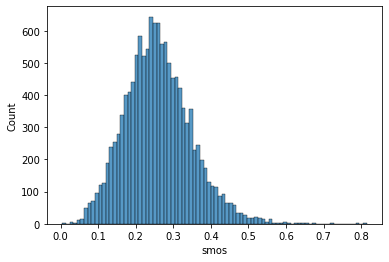

In [234]:
import seaborn as sns
sns.histplot(data=df, x="smos")

In [235]:
df["smos"].skew()

0.5300241346848901

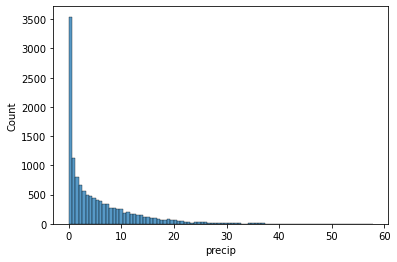

In [236]:
sns.histplot(data=df, x="precip")


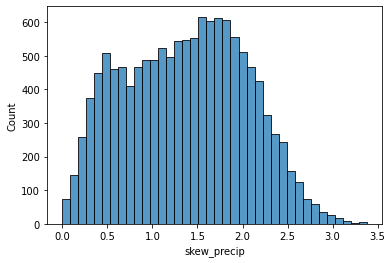

In [237]:
df["skew_precip"]=df["precip"]**0.3
sns.histplot(data=df, x="skew_precip")


In [238]:
df["skew_precip"].skew()

0.053156241600785345

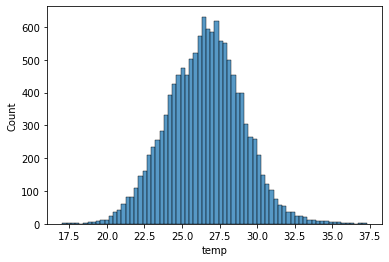

In [239]:
sns.histplot(data=df, x="temp")

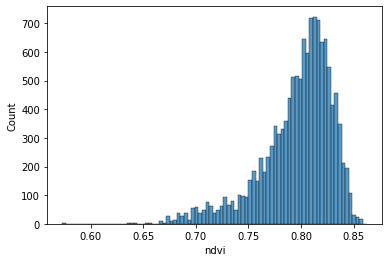

In [240]:
sns.histplot(data=df, x="ndvi")

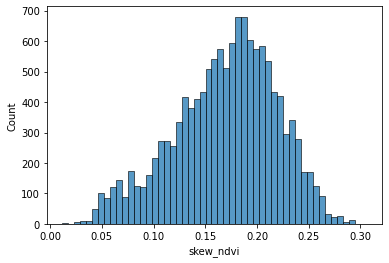

In [241]:
df["skew_ndvi"]=df["ndvi"]**8
sns.histplot(data=df, x="skew_ndvi")

In [242]:
df["skew_ndvi"].skew()

-0.39003247418743825

In [243]:
df

,start_date,smos,region_id,precip,temp,ndvi,month,year,Region 103,Region 104,Region 105,Region 93,Region 94,Region 95,Region 97,Region 98,Region 99,skew_precip,skew_ndvi
2,2014-01-02 00:00:00+00:00,0.192271,Region 93,0.315380,24.707605,0.679106,1,2014,0,0,0,1,0,0,0,0,0,0.707376,0.045238
3,2014-01-02 00:00:00+00:00,0.192271,Region 93,0.315380,24.707605,0.701431,1,2014,0,0,0,1,0,0,0,0,0,0.707376,0.058598
13,2014-01-11 00:00:00+00:00,0.180879,Region 93,0.581636,26.421176,0.745149,1,2014,0,0,0,1,0,0,0,0,0,0.849954,0.095048
17,2014-01-15 00:00:00+00:00,0.313318,Region 93,0.032051,24.305642,0.745149,1,2014,0,0,0,1,0,0,0,0,0,0.356247,0.095048
22,2014-01-20 00:00:00+00:00,0.267925,Region 93,0.023182,25.142744,0.747391,1,2014,0,0,0,1,0,0,0,0,0,0.323254,0.097360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30117,2021-12-23 00:00:00+00:00,0.431531,Region 105,3.345738,26.252479,0.806324,12,2021,0,0,1,0,0,0,0,0,0,1.436639,0.178680
30121,2022-03-08 00:00:00+00:00,0.447716,Region 105,2.124455,29.217803,0.795875,3,2022,0,0,1,0,0,0,0,0,0,1.253644,0.160976
30124,2022-03-11 00:00:00+00:00,0.447716,Region 105,0.021150,26.027421,0.795875,3,2022,0,0,1,0,0,0,0,0,0,0.314480,0.160976
30125,2022-03-12 00:00:00+00:00,0.447716,Region 105,0.092205,27.108212,0.795875,3,2022,0,0,1,0,0,0,0,0,0,0.489132,0.160976


Model for NDVI

In [244]:
X =df.drop(["start_date","temp","ndvi","precip","region_id"],axis=1)
y=df["temp"]

from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
model =XGBRegressor()

cv = model_selection.KFold(n_splits=5)
x=[]
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # For training, fit() is used
    model.fit(X_train, y_train)

    # Default metric is R2 for regression, which can be accessed by score()
    print(model.score(X_test, y_test))
 
    # For other metrics, we need the predictions of the model
    y_pred = model.predict(X_test)

    x.append(metrics.mean_absolute_error(y_test, y_pred))
    print(metrics.r2_score(y_test, y_pred))
print("mean MAE ",np.mean(x))

[17:53:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.2557355867391473
0.2557355867391473
[17:53:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.22933728225292693
0.22933728225292693
[17:53:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.21104517744630935
0.21104517744630935
[17:53:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.1570004060096748
0.1570004060096748
[17:53:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.17309359833283822
0.17309359833283822
mean MAE  1.699287153991778


In [245]:
model =XGBRegressor()
model.fit(X,y)
missing=merged_df[merged_df['temp'].isnull() & merged_df["ndvi"].notnull()]
missing.head()

[17:53:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,start_date,smos,region_id,precip,temp,ndvi,month,year,Region 103,Region 104,Region 105,Region 93,Region 94,Region 95,Region 97,Region 98,Region 99
0,2014-01-01 00:00:00+00:00,0.310787,Region 93,1.392393,NaN,0.679106,1,2014,0,0,0,1,0,0,0,0,0
1,2014-01-01 00:00:00+00:00,0.310787,Region 93,1.392393,NaN,0.701431,1,2014,0,0,0,1,0,0,0,0,0
4,2014-01-03 00:00:00+00:00,0.265683,Region 93,2.347846,NaN,0.679106,1,2014,0,0,0,1,0,0,0,0,0
5,2014-01-03 00:00:00+00:00,0.265683,Region 93,2.347846,NaN,0.701431,1,2014,0,0,0,1,0,0,0,0,0
6,2014-01-04 00:00:00+00:00,0.265683,Region 93,21.466357,NaN,0.701431,1,2014,0,0,0,1,0,0,0,0,0


In [246]:
X.columns

Index(['smos', 'month', 'year', 'Region 103', 'Region 104', 'Region 105',
       'Region 93', 'Region 94', 'Region 95', 'Region 97', 'Region 98',
       'Region 99', 'skew_precip', 'skew_ndvi'],
      dtype='object')

In [247]:
ind=missing.index
missing=missing[list(X.columns[:-2])+["precip","ndvi"]]
missing.columns=X.columns


            

In [248]:
pred=model.predict(missing)

In [249]:
len(ind)

17127

In [250]:
merged_df.isnull().sum()

start_date        0
smos              0
region_id         0
precip            0
temp          17127
ndvi              0
month             0
year              0
Region 103        0
Region 104        0
Region 105        0
Region 93         0
Region 94         0
Region 95         0
Region 97         0
Region 98         0
Region 99         0
dtype: int64

In [251]:
merged_df["temp"][ind]=pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [252]:
merged_df.isnull().sum()

start_date    0
smos          0
region_id     0
precip        0
temp          0
ndvi          0
month         0
year          0
Region 103    0
Region 104    0
Region 105    0
Region 93     0
Region 94     0
Region 95     0
Region 97     0
Region 98     0
Region 99     0
dtype: int64

In [253]:
merged_df.drop(["start_date","Region 103","Region 104","Region 105","Region 93","Region 94","Region 95","Region 97","Region 98","Region 99"],axis=1,inplace=True)

In [254]:
merged_df=merged_df.groupby(["month","year","region_id"]).mean().reset_index()

In [255]:
prod=pd.read_csv("/content/Production Quantity.csv")
prod

,start_date,end_date,prod,region_id
0,2015-01-01T00:00:00.000Z,2015-01-31T00:00:00.000Z,171725,93
1,2015-02-01T00:00:00.000Z,2015-02-28T00:00:00.000Z,188325,93
2,2015-03-01T00:00:00.000Z,2015-03-31T00:00:00.000Z,247856,93
3,2015-04-01T00:00:00.000Z,2015-04-30T00:00:00.000Z,282791,93
4,2015-05-01T00:00:00.000Z,2015-05-31T00:00:00.000Z,291057,93
...,...,...,...,...
715,2020-08-01T00:00:00.000Z,2020-08-31T00:00:00.000Z,57818,105
716,2020-09-01T00:00:00.000Z,2020-09-30T00:00:00.000Z,57474,105
717,2020-10-01T00:00:00.000Z,2020-10-31T00:00:00.000Z,51821,105
718,2020-11-01T00:00:00.000Z,2020-11-30T00:00:00.000Z,44947,105


In [256]:
merged_df.head()

,month,year,region_id,smos,precip,temp,ndvi
0,1,2014,Region 102,0.283492,7.366262,23.622705,0.802488
1,1,2014,Region 103,0.324239,9.046327,23.314787,0.782266
2,1,2014,Region 104,0.327300,3.579262,25.887578,0.741919
3,1,2014,Region 105,0.253454,4.564700,23.791977,0.752770
4,1,2014,Region 93,0.285080,2.436768,24.931589,0.734334


In [257]:
prod["start_date"]=pd.to_datetime(prod["start_date"])
prod["end_date"]=pd.to_datetime(prod["end_date"])
len(np.unique(prod["end_date"]-prod["start_date"]))

4

In [258]:
prod["start_date"]-=timedelta(days=365)

In [259]:
prod

,start_date,end_date,prod,region_id
0,2014-01-01 00:00:00+00:00,2015-01-31 00:00:00+00:00,171725,93
1,2014-02-01 00:00:00+00:00,2015-02-28 00:00:00+00:00,188325,93
2,2014-03-01 00:00:00+00:00,2015-03-31 00:00:00+00:00,247856,93
3,2014-04-01 00:00:00+00:00,2015-04-30 00:00:00+00:00,282791,93
4,2014-05-01 00:00:00+00:00,2015-05-31 00:00:00+00:00,291057,93
...,...,...,...,...
715,2019-08-02 00:00:00+00:00,2020-08-31 00:00:00+00:00,57818,105
716,2019-09-02 00:00:00+00:00,2020-09-30 00:00:00+00:00,57474,105
717,2019-10-02 00:00:00+00:00,2020-10-31 00:00:00+00:00,51821,105
718,2019-11-02 00:00:00+00:00,2020-11-30 00:00:00+00:00,44947,105


In [260]:
merged_df

,month,year,region_id,smos,precip,temp,ndvi
0,1,2014,Region 102,0.283492,7.366262,23.622705,0.802488
1,1,2014,Region 103,0.324239,9.046327,23.314787,0.782266
2,1,2014,Region 104,0.327300,3.579262,25.887578,0.741919
3,1,2014,Region 105,0.253454,4.564700,23.791977,0.752770
4,1,2014,Region 93,0.285080,2.436768,24.931589,0.734334
...,...,...,...,...,...,...,...
985,12,2021,Region 94,0.399431,4.491584,26.421777,0.791536
986,12,2021,Region 95,0.443722,10.687171,24.572357,0.794812
987,12,2021,Region 97,0.331407,7.283653,26.113787,0.818298
988,12,2021,Region 98,0.399631,12.050375,24.976248,0.821766


In [261]:
prod.drop("end_date",axis=1,inplace=True)
prod["month"]=prod["start_date"].dt.month
prod["year"]=prod["start_date"].dt.year
prod["region_id"]=prod["region_id"].astype(str)
prod["region_id"]="Region "+prod.region_id
prod.head()

,start_date,prod,region_id,month,year
0,2014-01-01 00:00:00+00:00,171725,Region 93,1,2014
1,2014-02-01 00:00:00+00:00,188325,Region 93,2,2014
2,2014-03-01 00:00:00+00:00,247856,Region 93,3,2014
3,2014-04-01 00:00:00+00:00,282791,Region 93,4,2014
4,2014-05-01 00:00:00+00:00,291057,Region 93,5,2014


In [262]:
merged_df

,month,year,region_id,smos,precip,temp,ndvi
0,1,2014,Region 102,0.283492,7.366262,23.622705,0.802488
1,1,2014,Region 103,0.324239,9.046327,23.314787,0.782266
2,1,2014,Region 104,0.327300,3.579262,25.887578,0.741919
3,1,2014,Region 105,0.253454,4.564700,23.791977,0.752770
4,1,2014,Region 93,0.285080,2.436768,24.931589,0.734334
...,...,...,...,...,...,...,...
985,12,2021,Region 94,0.399431,4.491584,26.421777,0.791536
986,12,2021,Region 95,0.443722,10.687171,24.572357,0.794812
987,12,2021,Region 97,0.331407,7.283653,26.113787,0.818298
988,12,2021,Region 98,0.399631,12.050375,24.976248,0.821766


In [358]:
final_df=merged_df.merge(prod,left_on=["region_id","month","year"],right_on=["region_id","month","year"])

In [359]:
final_df["date"]=final_df["start_date"].dt.date

In [360]:
final_df["day"]=1
final_df.head()

,month,year,region_id,smos,precip,temp,ndvi,start_date,prod,date,day
0,1,2014,Region 102,0.283492,7.366262,23.622705,0.802488,2014-01-01 00:00:00+00:00,401299,2014-01-01,1
1,1,2014,Region 103,0.324239,9.046327,23.314787,0.782266,2014-01-01 00:00:00+00:00,208233,2014-01-01,1
2,1,2014,Region 104,0.327300,3.579262,25.887578,0.741919,2014-01-01 00:00:00+00:00,27384,2014-01-01,1
3,1,2014,Region 105,0.253454,4.564700,23.791977,0.752770,2014-01-01 00:00:00+00:00,19382,2014-01-01,1
4,1,2014,Region 93,0.285080,2.436768,24.931589,0.734334,2014-01-01 00:00:00+00:00,171725,2014-01-01,1


In [361]:
final_df[final_df["year"]==2014]

,month,year,region_id,smos,precip,temp,ndvi,start_date,prod,date,day
0,1,2014,Region 102,0.283492,7.366262,23.622705,0.802488,2014-01-01 00:00:00+00:00,401299,2014-01-01,1
1,1,2014,Region 103,0.324239,9.046327,23.314787,0.782266,2014-01-01 00:00:00+00:00,208233,2014-01-01,1
2,1,2014,Region 104,0.327300,3.579262,25.887578,0.741919,2014-01-01 00:00:00+00:00,27384,2014-01-01,1
3,1,2014,Region 105,0.253454,4.564700,23.791977,0.752770,2014-01-01 00:00:00+00:00,19382,2014-01-01,1
4,1,2014,Region 93,0.285080,2.436768,24.931589,0.734334,2014-01-01 00:00:00+00:00,171725,2014-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
665,12,2014,Region 94,0.351574,14.749636,24.745713,0.797575,2014-12-01 00:00:00+00:00,15773,2014-12-01,1
666,12,2014,Region 95,0.299467,29.566399,23.372191,0.724323,2014-12-01 00:00:00+00:00,20155,2014-12-01,1
667,12,2014,Region 97,0.261463,9.243177,24.853479,0.781691,2014-12-01 00:00:00+00:00,34470,2014-12-01,1
668,12,2014,Region 98,0.228734,26.045870,24.291695,0.761597,2014-12-01 00:00:00+00:00,197408,2014-12-01,1


In [362]:
final_df["date"]=pd.to_datetime(final_df["date"])

In [363]:
dummy=pd.get_dummies(final_df["region_id"],drop_first=True)

final_df =final_df.join(dummy)
final_df.head()

,month,year,region_id,smos,precip,temp,ndvi,start_date,prod,date,day,Region 103,Region 104,Region 105,Region 93,Region 94,Region 95,Region 97,Region 98,Region 99
0,1,2014,Region 102,0.283492,7.366262,23.622705,0.802488,2014-01-01 00:00:00+00:00,401299,2014-01-01,1,0,0,0,0,0,0,0,0,0
1,1,2014,Region 103,0.324239,9.046327,23.314787,0.782266,2014-01-01 00:00:00+00:00,208233,2014-01-01,1,1,0,0,0,0,0,0,0,0
2,1,2014,Region 104,0.327300,3.579262,25.887578,0.741919,2014-01-01 00:00:00+00:00,27384,2014-01-01,1,0,1,0,0,0,0,0,0,0
3,1,2014,Region 105,0.253454,4.564700,23.791977,0.752770,2014-01-01 00:00:00+00:00,19382,2014-01-01,1,0,0,1,0,0,0,0,0,0
4,1,2014,Region 93,0.285080,2.436768,24.931589,0.734334,2014-01-01 00:00:00+00:00,171725,2014-01-01,1,0,0,0,1,0,0,0,0,0


In [364]:
final_df = final_df.set_index('date')

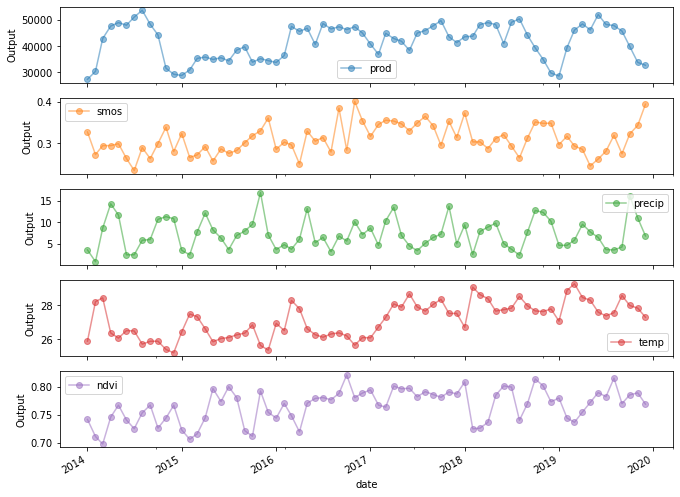

In [365]:
temp=final_df[final_df["region_id"]=="Region 104"]
cols_plot = ['prod', 'smos', 'precip',"temp","ndvi"]
axes = temp[cols_plot].plot(marker='o', alpha=0.5, linestyle='-', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Output')

In [430]:
df_train=final_df[final_df["year"]<2018]
df_test=final_df[final_df["year"]>2018]

In [431]:
df_train.drop(["region_id","start_date","month","year","day"],axis=1,inplace=True)
df_test.drop(["region_id","start_date","month","year","day"],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [432]:
df_train

,smos,precip,temp,ndvi,prod,Region 103,Region 104,Region 105,Region 93,Region 94,Region 95,Region 97,Region 98,Region 99
date,,,,,,,,,,,,,,
2014-01-01,0.283492,7.366262,23.622705,0.802488,401299,0,0,0,0,0,0,0,0,0
2014-01-01,0.324239,9.046327,23.314787,0.782266,208233,1,0,0,0,0,0,0,0,0
2014-01-01,0.327300,3.579262,25.887578,0.741919,27384,0,1,0,0,0,0,0,0,0
2014-01-01,0.253454,4.564700,23.791977,0.752770,19382,0,0,1,0,0,0,0,0,0
2014-01-01,0.285080,2.436768,24.931589,0.734334,171725,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,0.313747,4.072531,26.957192,0.805871,25864,0,0,0,0,1,0,0,0,0
2017-12-01,0.286411,5.761322,25.415487,0.821318,29514,0,0,0,0,0,1,0,0,0
2017-12-01,0.245024,3.905586,27.314726,0.810926,62917,0,0,0,0,0,0,1,0,0


In [433]:
exogenous_features=df_train.drop(["prod"],axis=1).columns


In [434]:
import seaborn as sns
from statsmodels.tsa.stattools import adfuller



test_results = adfuller(final_df["prod"])

print(f"ADF test statistic: {test_results[0]}")
print(f"p-value: {test_results[1]}")


ADF test statistic: -3.24241728447763
p-value: 0.017656996501690832


In [435]:
train_X

array([[[0.62146468, 0.20445733, 0.05717877, ..., 0.        ,
         0.        , 0.        ]],

       [[0.74044072, 0.25209527, 0.01933299, ..., 0.        ,
         0.        , 0.        ]],

       [[0.74937821, 0.0970776 , 0.33555093, ..., 0.        ,
         0.        , 0.        ]],

       ...,

       [[0.50914053, 0.10633045, 0.51095958, ..., 1.        ,
         0.        , 0.        ]],

       [[0.48953553, 0.18359217, 0.35509384, ..., 0.        ,
         1.        , 0.        ]],

       [[0.65089954, 0.11331874, 0.38252694, ..., 0.        ,
         0.        , 1.        ]]])

In [436]:
train_X=df_train[df_train.drop(["prod"],axis=1).columns]
train_y=df_train["prod"]
test_X=df_test[exogenous_features]
test_y=df_test["prod"]

In [437]:
train_X

,smos,precip,temp,ndvi,Region 103,Region 104,Region 105,Region 93,Region 94,Region 95,Region 97,Region 98,Region 99
date,,,,,,,,,,,,,
2014-01-01,0.283492,7.366262,23.622705,0.802488,0,0,0,0,0,0,0,0,0
2014-01-01,0.324239,9.046327,23.314787,0.782266,1,0,0,0,0,0,0,0,0
2014-01-01,0.327300,3.579262,25.887578,0.741919,0,1,0,0,0,0,0,0,0
2014-01-01,0.253454,4.564700,23.791977,0.752770,0,0,1,0,0,0,0,0,0
2014-01-01,0.285080,2.436768,24.931589,0.734334,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,0.313747,4.072531,26.957192,0.805871,0,0,0,0,1,0,0,0,0
2017-12-01,0.286411,5.761322,25.415487,0.821318,0,0,0,0,0,1,0,0,0
2017-12-01,0.245024,3.905586,27.314726,0.810926,0,0,0,0,0,0,1,0,0


In [438]:
test_X

,smos,precip,temp,ndvi,Region 103,Region 104,Region 105,Region 93,Region 94,Region 95,Region 97,Region 98,Region 99
date,,,,,,,,,,,,,
2019-01-01,0.291514,5.753330,24.996682,0.829465,0,0,0,0,0,0,0,0,0
2019-01-01,0.323595,11.542739,25.291567,0.827069,1,0,0,0,0,0,0,0,0
2019-01-01,0.297200,4.642860,27.060539,0.779904,0,1,0,0,0,0,0,0,0
2019-01-01,0.347482,4.562417,25.257287,0.791783,0,0,1,0,0,0,0,0,0
2019-01-01,0.364349,3.671157,26.603817,0.806232,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-02,0.344979,3.122342,27.127957,0.782503,0,0,0,0,1,0,0,0,0
2019-12-02,0.342284,7.258846,25.406307,0.790116,0,0,0,0,0,1,0,0,0
2019-12-02,0.369303,5.022119,26.965799,0.812285,0,0,0,0,0,0,1,0,0


In [439]:
import xgboost
#model = RandomForestRegressor()
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(train_X,train_y)
pred=model.predict(test_X)
print(metrics.mean_absolute_percentage_error(test_y, pred))
print(metrics.mean_absolute_error(test_y, pred))

[19:20:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.3209097114254361
30856.40118815104


In [440]:
train_X=np.array(train_X)
test_X=np.array(test_X)

In [441]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [442]:
import keras
from keras.layers import Dense
from keras.models import Sequential


from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [443]:
#Model
import tensorflow as tf
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
num_vars=train_X.shape[2]
model=Sequential()
model.add(LSTM(1000,input_shape=(1,num_vars)))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer="Adam")

model.fit(train_X,train_y,epochs=50,batch_size=8,verbose=1)



Epoch 1/50
60/60 [==============================] - 2s 11ms/step - loss: 44027351040.0000
Epoch 2/50
60/60 [==============================] - 1s 11ms/step - loss: 24135895040.0000
Epoch 3/50
60/60 [==============================] - 1s 11ms/step - loss: 20739151872.0000
Epoch 4/50
60/60 [==============================] - 1s 11ms/step - loss: 20665030656.0000
Epoch 5/50
60/60 [==============================] - 1s 11ms/step - loss: 18866081792.0000
Epoch 6/50
60/60 [==============================] - 1s 11ms/step - loss: 14658672640.0000
Epoch 7/50
60/60 [==============================] - 1s 11ms/step - loss: 9551095808.0000
Epoch 8/50
60/60 [==============================] - 1s 11ms/step - loss: 7402545664.0000
Epoch 9/50
60/60 [==============================] - 1s 11ms/step - loss: 6293267968.0000
Epoch 10/50
60/60 [==============================] - 1s 11ms/step - loss: 5631620096.0000
Epoch 11/50
60/60 [==============================] - 1s 11ms/step - loss: 4866550272.0000
Epoch 12/50
6

In [444]:
pred=model.predict(test_X)
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_y, pred)

0.17892449136247618